In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import dlc_bci as bci
from dlc_practical_prologue import *

import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable

Load dataset

In [2]:
tr_input, tr_target = bci.load("bci", train=True, one_khz=True)
te_input, te_target = bci.load("bci", train=False, one_khz=True)
tr_target = convert_to_one_hot_labels(tr_input, tr_target)
te_target = convert_to_one_hot_labels(te_input, te_target)

Standardize

In [3]:
tr_input = torch.nn.functional.normalize(tr_input, p=2, dim=0) 
te_input = torch.nn.functional.normalize(te_input, p=2, dim=0) 

tr_input, tr_target = Variable(tr_input.view(-1,28*500)), Variable(tr_target)
te_input, te_target = Variable(te_input.view(-1,28*500)), Variable(te_target)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 500, 200)
        self.fc2 = nn.Linear(200, 2)
        
    def forward(self, x, mode=False):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
# construct and train model
model = Net()
tr_loss, te_loss = bci.train_model(model, tr_input, tr_target, 4, te_input, te_target, 4, 25)
torch.save(model.state_dict(), os.getcwd() + "v1.pth")

# compute train and test errors
nb_tr_errors = bci.compute_nb_errors(model, tr_input, tr_target, 4)
nb_te_errors = bci.compute_nb_errors(model, te_input, te_target, 4)

print('tr error {:0.2f}% {:d}/{:d}'.format((100 * nb_tr_errors) / tr_input.size(0), nb_tr_errors, tr_input.size(0)))
print('te error {:0.2f}% {:d}/{:d}'.format((100 * nb_te_errors) / te_input.size(0), nb_te_errors, te_input.size(0)))

epoch 0 tr loss 81.61 te loss 26.16
epoch 1 tr loss 80.72 te loss 26.29
epoch 2 tr loss 80.60 te loss 26.85
epoch 3 tr loss 80.60 te loss 27.88
epoch 4 tr loss 80.53 te loss 30.47
epoch 5 tr loss 80.47 te loss 34.31
epoch 6 tr loss 79.97 te loss 41.99
epoch 7 tr loss 79.12 te loss 49.28
epoch 8 tr loss 77.98 te loss 61.27
epoch 9 tr loss 76.67 te loss 64.13
epoch 10 tr loss 75.19 te loss 65.48
epoch 11 tr loss 74.39 te loss 76.69
epoch 12 tr loss 73.37 te loss 80.03
epoch 13 tr loss 72.51 te loss 89.23
epoch 14 tr loss 73.34 te loss 76.29
epoch 15 tr loss 70.56 te loss 97.18
epoch 16 tr loss 70.97 te loss 60.94
epoch 17 tr loss 69.64 te loss 90.38
epoch 18 tr loss 66.58 te loss 107.72
epoch 19 tr loss 65.64 te loss 122.42
epoch 20 tr loss 64.42 te loss 72.93
epoch 21 tr loss 70.25 te loss 80.29
epoch 22 tr loss 62.59 te loss 91.60
epoch 23 tr loss 82.66 te loss 29.77
epoch 24 tr loss 71.11 te loss 105.01
tr error 49.37% 156/316
te error 48.00% 48/100


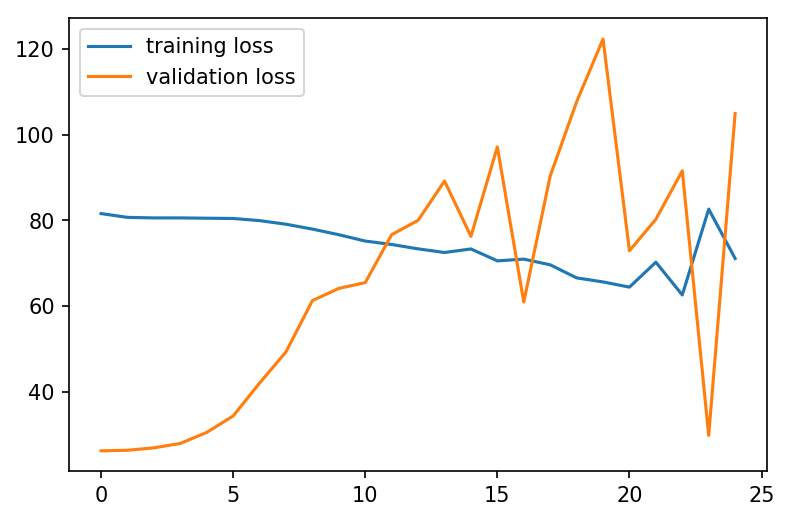

In [14]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

plt.figure()
plt.plot(tr_loss, label='training loss')
plt.plot(te_loss, label='validation loss')
plt.legend(loc='upper left')